Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


Loading dataset

In [ ]:
df = pd.read_csv('admission_predict.csv')

Exploring the dataset

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Renaming columns to simpler words


In [ ]:
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Probability'})
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Basic Visualizations

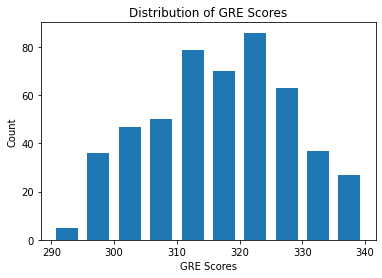

In [ ]:
fig = plt.hist(df['GRE'], rwidth=0.7)
plt.title("Distribution of GRE Scores")
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.show()

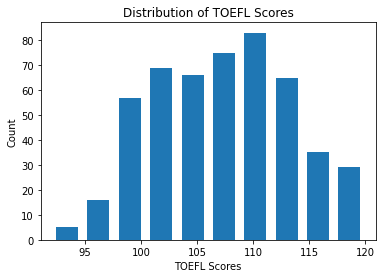

In [ ]:
fig = plt.hist(df['TOEFL'], rwidth=0.7)
plt.title('Distribution of TOEFL Scores')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')
plt.show()

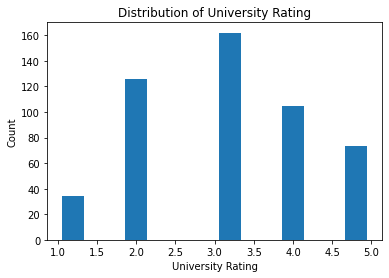

In [ ]:
fig = plt.hist(df['University Rating'], rwidth=0.7)
plt.title('Distribution of University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

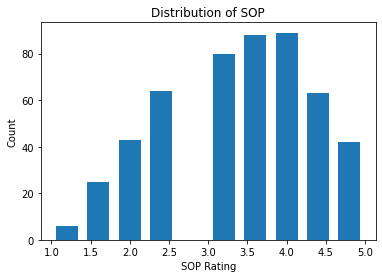

In [ ]:
fig = plt.hist(df['SOP'], rwidth=0.7)
plt.title('Distribution of SOP')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

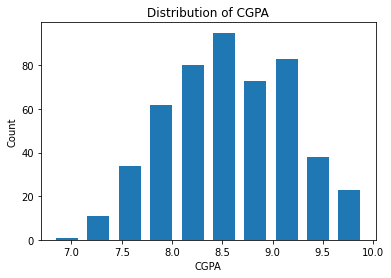

In [ ]:
fig = plt.hist(df['CGPA'], rwidth=0.7)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

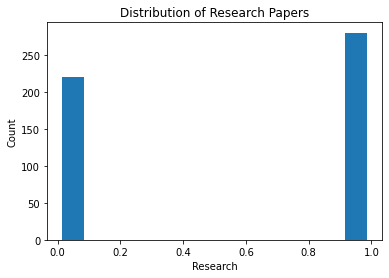

In [ ]:
fig = plt.hist(df['Research'], rwidth=0.7)
plt.title('Distribution of Research Papers')
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

Data Cleaning

In [ ]:
# Removing the serial no, column
df.drop('Serial No.', axis='columns', inplace=True)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Replacing the 0 values from ['GRE','TOEFL','University Rating','SOP','LOR','CGPA'] by NaN
df_copy = df.copy(deep=True)
df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']] = df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']].replace(0, np.NaN)

Scatter Plots

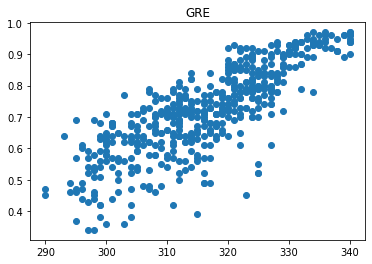

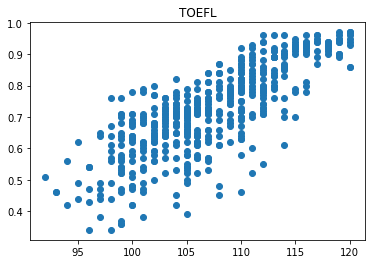

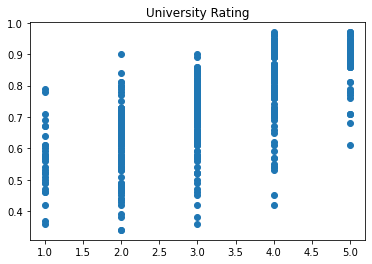

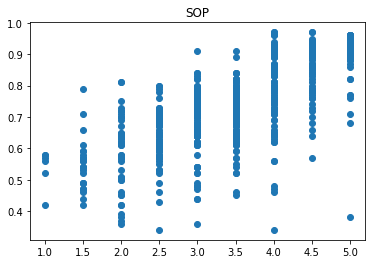

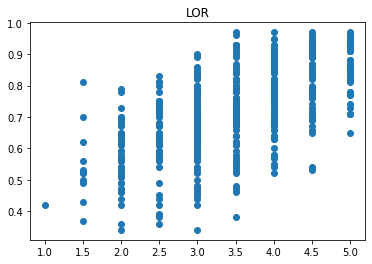

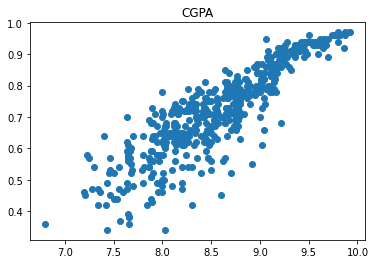

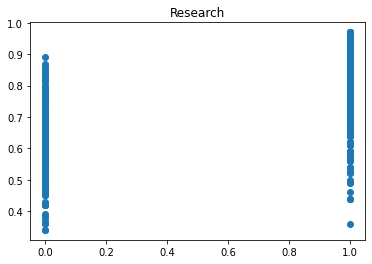

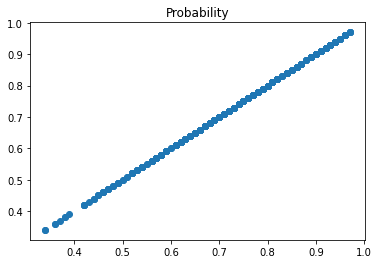

In [ ]:
def plot_scatter(Data,list1):
    for ri, rd in Data.iteritems():
        plt.scatter(rd,list1)
        plt.title(ri)
        plt.show()
y=df['Probability']
plot_scatter(df,y)

Correlation Matrix

In [ ]:
import seaborn as sns

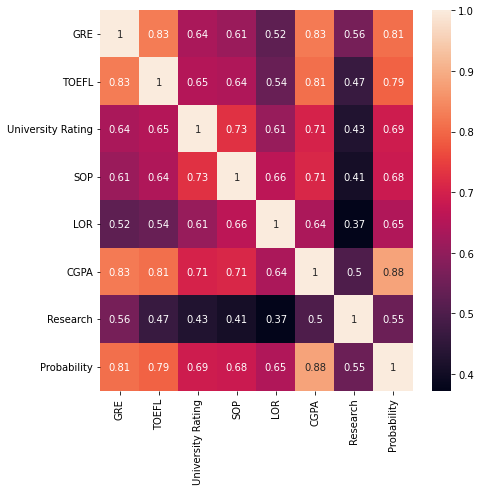

In [ ]:
fig = plt.figure(figsize = (7,7))
sns.heatmap(df.corr(), annot = True)

Model Building

In [ ]:
# Splitting the dataset in features and outcome
X = df_copy.drop('Probability', axis='columns')
y = df_copy['Probability']

In [ ]:
from sklearn.model_selection import train_test_split

Splitting into test set and training set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
y_test=list(y_test)

In [ ]:
len(X_train)

400

In [ ]:
len(X_test)

100

Random Forest Regession

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor(n_estimators=800,random_state=100)
model.fit(X_train,y_train)
y_pred_random=list(model.predict(X_test))

In [ ]:
from sklearn.metrics import r2_score
print("R2 score for Random Forest Regression")
r2_score(y_test, y_pred_random)

R2 score for Random Forest Regression


0.7682228176533836

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linearregression = LinearRegression(normalize=True)
linearregression.fit(X_test, y_test)
y_pred_linearregression = list(linearregression.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
print("R2 score for Linear Regression")
r2_score(y_test, y_pred_linearregression)

R2 score for Linear Regression


0.8049656717668252

Decesion Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tr=DecisionTreeRegressor()
tr.fit(X_train,y_train)
y_pred_decision=list(tr.predict(X_test))

In [ ]:
print("R2 score for Decesion Tree Regression")
r2_score(y_test, y_pred_decision)

R2 score for Decesion Tree Regression


0.5360032776810408

In [ ]:
# Prediction 1
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model.predict([[337, 118, 4, 4.5, 4.5, 9.65, 0]])[0]*100, 3)))

Chance of getting into UCLA is 92.819%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Prediction 2
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model.predict([[320, 113, 2, 2.0, 2.5, 8.64, 1]])[0]*100, 3)))

Chance of getting into UCLA is 77.754%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
